In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$         INITIAL SETTINGS - НАЧАЛЬНЫЕ УСТАНОВКИ          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [1]:
# Pandas
import pandas as pd
import numpy as np

In [2]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Date & Time
from datetime import datetime

In [4]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [6]:
# Посмотреть текущую дату:
print(datetime.today())

# Посмотреть текущую дату:
print(datetime.now().date())

2022-01-31 19:22:52.366205
2022-01-31


In [7]:
# Посмотреть текущее время:
date_now = datetime.today()
print(date_now.strftime('%H:%M:%S'))
print(datetime.today().strftime('%H:%M:%S'))

22:05:59
22:05:59


In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTIONS          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [3]:
file_search = 'C:/Users/Андрей/Downloads/searchquery_ayaweb7.csv'

In [4]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def search_report(file_path):
    df = pd.read_csv(file_path, skiprows=4, sep=';')
    df = df \
    .iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] \
    .rename(columns={'Дата': 'date',
                    'Кампания': 'campaign',
                    'Группа': 'group',
                    '№ Объявления': 'number_ad',
                    'Условие показа': 'condition',
                    'Поисковый запрос': 'search_query',
                    'Подобранная фраза': 'phrase',
                    'Площадка': 'platform',
                    'Категория таргетинга': 'category',
                    'Показы': 'shows',
                    'Клики': 'click',
                    'CTR (%)': 'ctr',
                    'Расход (руб.)': 'expense',
                    'Ср. цена клика (руб.)': 'average_cost_click',
                    'Ср. позиция показов': 'average_position_show',
                    'Ср. позиция кликов': 'average_position_click',
                    'Отказы (%)': 'refusals',
                    'Глубина (стр.)': 'depth',
                    'Конверсия (%)': 'conversion_percent',
                    'Цена цели (руб.)': 'price',
                    'Конверсии': 'conversion'}) \
    .replace('-', 0)
    

    
    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
    df.loc[:, 'ctr':'price'] = df.loc[:, 'ctr':'price'].replace(',','.', regex=True).astype(float)
    
    df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)
    df['campaign'] = df['campaign'].apply(lambda x: x.split(' - ')[1])
#     .replace('Спектр - Пиломатериалы - Поиск', 'Пиломатериалы') \
#     .replace('Спектр - Стройматериалы - Поиск', 'Стройматериалы') \
#     .replace('Спектр - Услуги - Поиск', 'Услуги') \
#     .replace('Спектр - Лестницы - Поиск', 'Лестницы')
    
    
    
    return df

In [5]:
search = search_report(file_search)

In [6]:
search.head(3)

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,...,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion
0,10.02.2022,bonolit,Стройматериалы,Стройматериалы,M-11425986762,стройматериалы,0,Яндекс,Широкие запросы,1,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0
1,10.02.2022,ttps petrovich ru catalog 18002195 629094,Стройматериалы,Стройматериалы,M-11425986761,товары стройматериалов,0,Яндекс,Запросы с упоминанием конкурентов,1,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0
2,10.02.2022,vigor v4 стекло купить,Стройматериалы,Стекло,M-11425986763,стекло купить,0,Яндекс,Целевые запросы,1,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
search.dtypes

date                       object
search_query               object
campaign                   object
group                      object
number_ad                  object
condition                  object
phrase                     object
platform                   object
category                   object
shows                       int32
click                       int32
ctr                       float64
expense                   float64
average_cost_click        float64
average_position_show     float64
average_position_click    float64
refusals                  float64
depth                     float64
conversion_percent        float64
price                     float64
conversion                  int32
dtype: object

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          SPECIFICATIONS          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [8]:
print('search.shape - ', search.shape)

search.shape -  (1309, 21)


In [129]:
search.columns

Index(['date', 'search_query', 'campaign', 'group', 'number_ad', 'condition',
       'phrase', 'platform', 'category', 'shows', 'click', 'ctr', 'expense',
       'average_cost_click', 'average_position_show', 'average_position_click',
       'refusals', 'depth', 'conversion_percent', 'price', 'conversion'],
      dtype='object')

In [15]:
search.query("group == 'Балясина винтовая'")

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,...,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion
16,10.02.2022,деревянные перила в новороссийске,Лестницы,Балясина винтовая,M-11425995639,перила из дерева,деревянный перила из,Яндекс,Целевые запросы,1,...,100.0,19.54,19.54,3.0,3.0,100.0,1.0,0.0,0.0,0
343,08.02.2022,установка балясин на деревянную лестницу и пер...,Лестницы,Балясина винтовая,M-11425995638,перила из дерева,0,Яндекс,не определена,1,...,0.0,0.00,0.00,5.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
search.tail()

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,...,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion
195,13.12.2021,материал важный в строительстве,Стройматериалы,Стройматериалы,M-11425986762,стройматериалы,материал строительство -магазин -купить -сайт...,Яндекс,не определена,1,...,"0,00","0,00",0,"5,00",0,0,0,0,0,0
196,13.12.2021,резные доски наличники деревянные,Пиломатериалы,Наличник,M-11430797630,наличник деревянный,0,Яндекс,Целевые запросы,1,...,"0,00","0,00",0,"6,00",0,0,0,0,0,0
197,13.12.2021,резные доски наличники деревянные,Пиломатериалы,Наличник,M-11430797631,наличник деревянный,0,Яндекс,не определена,1,...,"0,00","0,00",0,"7,00",0,0,0,0,0,0
198,13.12.2021,стройбаза сыктывкар,Стройматериалы,Стройматериалы,M-11425986761,магазин стройматериалов,0,Яндекс,Запросы с упоминанием конкурентов,1,...,"0,00","0,00",0,"7,00",0,0,0,0,0,0
199,13.12.2021,шпаклевка шитрок аналоги,Стройматериалы,Стройматериалы,M-11425986761,стройматериалы,0,Яндекс,Целевые запросы,1,...,"0,00","0,00",0,"5,00",0,0,0,0,0,0


In [15]:
search.conversion.unique()

array([0, 1])

In [9]:
# Подсчёт количества показов и кликов и конверсий
print('search.shows.sum (Количество показов) - ', search.shows.sum())
print('search.click.sum (Количество кликов) - ', search.click.sum())
print('search.conversion.sum (Количество конверсий) - ', search.conversion.sum())

search.shows.sum (Количество показов) -  1446
search.click.sum (Количество кликов) -  89
search.conversion.sum (Количество конверсий) -  6


In [ ]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&          ANALYTICS          &&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [10]:
# Количество уникальных запросов
search \
    .query("group == 'Стройматериалы'") \
    .search_query \
    .nunique()

529

In [11]:
# Общее количество запросов
search.query("group == 'Стройматериалы'").search_query.count()

604

In [12]:
search.search_query.count()

1309

In [13]:
# Тексты уникальных запросов
search.query("group == 'Стройматериалы'").search_query.unique()

array(['bonolit', 'ttps petrovich ru catalog 18002195 629094',
       'ассортимент товара для открытия стройматериала',
       'ассортимент товаров в магазине строй сам коряжма',
       'асфальтобетонная смесь цена за тонну', 'брусок из полимера',
       'гашеная известь купить с доставкой',
       'джут межвенцовый 150 8 10мм 20м',
       'джут межвенцовый 180 8 10мм 20м', 'жби коряжма',
       'каменная вата технониколь', 'красный горбыль',
       'ламинированный металл технониколь',
       'магазин лес и дом коряжма каталог товаров',
       'мастерок строительный магазин березники',
       'мастерок строительный магазин двинской березник',
       'плоский шифер экологичность', 'ракушечник в пэрис купить',
       'ротбанд', 'спартак киров магазин стройматериалов',
       'стекломагнезитовый лист цена', 'строительный магазин луковецкий',
       'строительный магазин рядом', 'строй магазин',
       'строй магазин дача вычегодский', 'строй магазин реклама',
       'стройторг чиркова', '

In [19]:
search.query("group == 'Стройматериалы'").search_query

2                              салехард магазин строймир
5                                пеноплекс 100 мм купить
13                                 стропила тверь купить
14     купить монолитный поликарбонат от производител...
16                               волма слой 30 кг купить
                             ...                        
902         супердиффузионную гидроизоляционную мембрану
904      тд вимос кировск лен обл каталог товаров и цены
905            ту 5767 006 54349294 2014 пеноплекс стена
911                       цена на пиломатериалы на бирже
915                                     ярославль кирпич
Name: search_query, Length: 414, dtype: object

In [20]:
search.query("search_query == 'играть в шахматы купить сруб'").shows.count()

21

In [65]:
search.query("group == 'Стройматериалы' & shows > 1").search_query

292           марлен магазин стройматериалов архангельск
303                  виртуальный магазин стройматериалов
304                             выкладка стройматериалов
422                                    мегастрой коряжма
461                                       стройматериалы
533    цсм вологда официальный сайт стройматериалы ка...
Name: search_query, dtype: object

In [22]:
# @@@@@@@@@@@@@@@@@@@@@@            ВЫБОРКА ПОКАЗОВ ДЛЯ ОПРЕДЕЛЕНИЯ МИНУС СЛОВ            @@@@@@@@@@@@@@@@@@@@@@

# Чтобы использовать переменные из текущего пространства имен, вы должны использовать символ @ перед именем переменной:
gruppa = 'Срубы'
print('Количество показов:', search.query("group == @gruppa").shows.sum())

Количество показов: 310


In [21]:
# @@@@@@@@@@@@@@@@@@@@@@            ВЫБОРКА ПОКАЗОВ ДЛЯ ОПРЕДЕЛЕНИЯ МИНУС СЛОВ            @@@@@@@@@@@@@@@@@@@@@@

gruppa = 'Срубы'
print('Группа:', gruppa)
print('Количество показов:', search.query("group == @gruppa").shows.sum())
print('Количество запросов:', search.query("group == @gruppa").search_query.count())
print('Количество уникальных запросов:', search.query("group == @gruppa").search_query.nunique())
print('Количество кликов:', search.query("group == @gruppa").click.sum())

Группа: Срубы
Количество показов: 310
Количество запросов: 277
Количество уникальных запросов: 179
Количество кликов: 36


In [23]:
print('Уникальные запросы по группе:', search.query("group == @gruppa").search_query.unique())

Уникальные запросы по группе: ['играть в шахматы купить сруб' 'купить сруб бани в архангельской области'
 'купить сруб бани из бревна недорого'
 'купить сруб бани из бревна недорого в архангельской области'
 'купить сруб бани из бревна недорого в емецке'
 'купить сруб бани из бревна недорого в холмогорский район'
 'купить сруб дома' 'купить сруб дома в архангельской области' 'сруб бани'
 'сруб бани 6х6 из бруса цена под ключ проекты и цены'
 'срубы бань в вилегодском' 'срубы из оцилиндрованного бревна'
 'купить готовый сруб дома' 'купить сруб бани'
 'сруб бани 3х4 из бревна цена' 'сруб бани из бревна с стропилами'
 'сруб дома из бруса проекты и цены'
 'сруб дома из бруса проекты и цены коми' 'сруб из бруса'
 'установка стропил на сруб из бревна' 'шипицыно срубы бань цена'
 'купить сруб бани в смоленске' 'полезная высота бревна 40 50 в срубе'
 'продаю сруб' 'сруб 3х6 из оцилиндрованного бревна'
 'сруб бани 5 на 2 5 в емецке стоимость' 'сруб бани 6 × 5 цена из бревна'
 'сруб бани купить'

In [68]:
unique_query = list(unique_query)

In [164]:
# print(sorted(unique_query))

In [ ]:
# Я хотел бы получить список имен, которые встречаются в столбце более одного раза. Как мне это сделать?
counts = df.groupby('name').size()
df2 = pd.DataFrame(counts, columns = ['size'])
df2 = df2[df2.size>1]

In [240]:
# Я хотел бы получить список имен, которые встречаются в столбце более одного раза. Как мне это сделать?
# counts = search.groupby('search_query').size()
# df2 = pd.DataFrame(counts, columns = ['size'])
# df2 = df2[df2.size>1]
# print(df2)

In [70]:
# Выборка всех повторов в поисковых запросах и их количество
names = search.query("group == 'Стекло'").search_query.value_counts()
names[names > 1]

купить стекло на опм                                3
где в архангельске можно заказать нарезку стекла    3
купить стекло для телевизора lg 43um7020plf         2
купить сенсорное стекло для хонор 10 лайт           2
стекла корень                                       2
купить стекло для керосиновых ламп                  2
купить стекло в онеге                               2
купить стекло на фару лк200 2012г                   2
разбилось стекло на лицо                            2
стекло для дрипки зевс                              2
стекло на обь м с калиткой купить                   2
пробники стекло 2мл                                 2
Name: search_query, dtype: int64

In [71]:
names.index[names > 1]

Index(['купить стекло на опм',
       'где в архангельске можно заказать нарезку стекла',
       'купить стекло для телевизора lg 43um7020plf',
       'купить сенсорное стекло для хонор 10 лайт', 'стекла корень',
       'купить стекло для керосиновых ламп', 'купить стекло в онеге',
       'купить стекло на фару лк200 2012г', 'разбилось стекло на лицо',
       'стекло для дрипки зевс', 'стекло на обь м с калиткой купить',
       'пробники стекло 2мл'],
      dtype='object')

In [268]:
# duplicateCheck = search.duplicated(subset=['Name', 'Date',], keep=False)

# print(search[duplicateCheck])

In [273]:
# duplicateCheck = search.duplicated(subset=['group', 'search_query'], keep=False)

# search[duplicateCheck]

In [259]:
# funcs_groups = search.query("group == 'Стекло'").search_query
# funcs_groups[(funcs_groups.count().search_query>1)]

In [274]:
# как найти дубликаты на основе значения столбца в pandas df.
df = pd.DataFrame({
    'ann_id': [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2],
    'unique_id': ['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
                  'apple', 'apple', 'apple', 'mango', 'mango', 'mango',
                  'orange', 'orange', 'orange'],
    'start': [0, 2, 4, 6, 0, 2, 4, 60, 22, 44, 33, 77, 99, 11, 30, 50],
    'end': [1, 3, 5, 7, 1, 3, 5, 7, 33, 55, 66, 88, 89, 22, 40, 60]
})

output = df[df.duplicated(subset=['unique_id', 'start', 'end'], keep=False)]
print(output)

   ann_id unique_id  start  end
0       1     apple      0    1
1       1     apple      2    3
2       1     apple      4    5
4       2     apple      0    1
5       2     apple      2    3
6       2     apple      4    5


In [276]:
# output = search[search.duplicated(subset=['search_query', 'shows', 'click'], keep=False)]
# print(output)

In [278]:
# generate a table of those culprit rows which are duplicated:
dups = search.groupby(search.search_query.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

15

In [24]:
search.query("group == 'Срубы' & shows > 1").search_query

27                           играть в шахматы купить сруб
272                         стоимость сруба 6х8 из бревна
288                          играть в шахматы купить сруб
305     сруб дома 12х12 из бревна в чашу, купить в вел...
313     стоимость сборки сруба из готового оцилиндрова...
354                       купить сруб бани в красноборске
444              договор на заказ сруба из бревна скачать
488     срубы изготовление продажа строительство дачны...
489     срубы изготовление продажа строительство дачны...
506                          играть в шахматы купить сруб
507                     изготовление срубов бань под ключ
524     рубка сруба в теплый угол из из профилированно...
530     сруб дома из бревна 8х8 цена арх обл на 50 куб...
532                              сруб дома из бруса 1 ряд
749                        куплю́ сруб бани 3на3 в коноше
910                          играть в шахматы купить сруб
923                                             сруб бани
971           

In [25]:
# TABLE_1: Общее количество кликов по рекламе для каждой группы
group_active = search.groupby('group', as_index=False) \
    .agg({'click': 'sum'}) \
    .rename(columns={'click': 'sum_click'})# \

group_active

,group,sum_click
0,Балясина винтовая,0
1,Балясина плоская,0
2,Брус,8
3,Брусок и рейка,0
4,Вагонка,13
5,Гипсокартон,6
6,Доска,11
7,Заборы,6
8,Имитация,6
9,Кровля,1


In [28]:
# Общее количество кликов по рекламе:
group_active.sum_click.sum()

143

In [26]:
# TABLE_2: Общее количество конверсий для каждой группы
group_conversion = search.groupby('group', as_index=False) \
    .agg({'conversion': 'sum'}) \
    .rename(columns={'conversion': 'sum_conversion'})# \

group_conversion

,group,sum_conversion
0,Балясина винтовая,0
1,Балясина плоская,0
2,Брус,0
3,Брусок и рейка,0
4,Вагонка,0
5,Гипсокартон,1
6,Доска,1
7,Заборы,0
8,Имитация,0
9,Кровля,0


In [30]:
# Общее количество конверсий:
group_conversion.sum_conversion.sum()

13

In [32]:
# TABLE_3: Общее количество показов рекламы для каждой группы # с числом показов >= 1
group_popular = search.groupby('group', as_index=False) \
    .agg({'shows': 'sum'}) \
    .rename(columns={'shows': 'sum_shows'})# \
#    .query('count_shows > 1')

group_popular

,group,sum_shows
0,Балясина винтовая,11
1,Балясина плоская,28
2,Брус,81
3,Брусок и рейка,24
4,Вагонка,64
5,Гипсокартон,100
6,Доска,184
7,Заборы,100
8,Имитация,59
9,Кровля,14


In [33]:
# Общее количество показов рекламы:
group_popular.sum_shows.sum()

2330

In [34]:
# TABLE_4: Количество уникальных запросов ПО ГРУППАМ ОБЪЯВЛЕНИЙ - "SEARCH"
lovely_query = search.groupby('group', as_index=False) \
    .agg({'search_query': pd.Series.nunique}) \
    .rename(columns={'search_query': 'unique_query'})# \

#lovely_query = search.query("group == 'Фанера'").search_query.unique()

lovely_query

,group,unique_query
0,Балясина винтовая,7
1,Балясина плоская,22
2,Брус,61
3,Брусок и рейка,19
4,Вагонка,41
5,Гипсокартон,64
6,Доска,124
7,Заборы,81
8,Имитация,22
9,Кровля,10


In [35]:
# Общее количество уникальных запросов:
lovely_query.unique_query.sum()

1719

In [36]:
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ и самые популярные запросы по группам
lovely_query_count = search.groupby(['group', 'search_query'], as_index=False) \
    .agg({'shows': 'count'}) \
    .sort_values(['shows', 'group'], ascending=[False, True]) \
    .groupby('group') \
    .head(1) \
    .rename(columns={'search_query': 'popular_query','shows': 'count_popular_shows'})

lovely_query_count

,group,popular_query,count_popular_shows
624,Срубы,играть в шахматы купить сруб,21
1628,Фанера,фанера,9
426,Имитация,имитация бруса купить,8
172,Гипсокартон,гипсокартон цена,7
123,Вагонка,вагонка купить,5
286,Доска,купить доску обрезную 50х150х6000 цена за куб,5
37,Брус,брус купить,4
365,Заборы,заборы из дерева для частного дома,4
481,Пиломатериалы,доска обрезная,4
445,Кровля,прайс лист на установку кровли в городе грязи,3


In [144]:
lovely_query_count.shape

(19, 3)

In [37]:
# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
popular_query = group_popular \
    .merge(group_active, on='group', how='inner') \
    .merge(group_conversion, on='group', how='inner') \
    .merge(lovely_query, on='group', how='inner') \
    .merge(lovely_query_count, on='group', how='inner')

In [38]:
popular_query.sort_values('unique_query', ascending = False)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_shows
20,Стройматериалы,468,13,1,389,выкладка стройматериалов,3
23,Фанера,386,26,2,300,фанера,9
19,Стекло,271,3,2,227,"Конфетница <> 828-246/ 10*6см, стекло",3
18,Срубы,310,36,5,179,играть в шахматы купить сруб,21
6,Доска,184,11,1,124,купить доску обрезную 50х150х6000 цена за куб,5
13,Пиломатериалы,119,3,0,89,доска обрезная,4
7,Заборы,100,6,0,81,заборы из дерева для частного дома,4
5,Гипсокартон,100,6,1,64,гипсокартон цена,7
2,Брус,81,8,0,61,брус купить,4
4,Вагонка,64,13,0,41,вагонка купить,5


In [13]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION MERGE          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция объединяет таблицы, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def merge_report(tab1, tab2):
#    df = tab1.merge(tab2, how = 'inner')
#    df = pd.merge(tab1, tab2, left_on ='date', right_on = 'group', how='left')
#    df = tab1.merge(tab2, on = ['date', 'group'])
#    df = pd.merge(tab1, tab2, on = ['date', 'group', 'condition'], how='inner')
    df = pd.merge(tab1, tab2, on = ['date', 'group', 'condition'], how='left')    
#    df = pd.merge(tab1, tab2, on = 'date')
#    df = tab1.join(tab2, lsuffix='_l', rsuffix='_r')
    
    columns_titles = ['date', 'search_query', 'condition',  'conversion_percent', 'price',
        'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr', 'ctr_master', 'expense', 'campaign',
        'group', 'number_ad', 'region', 'device', 'gender',
        'category', 'average_cost_click', 'average_position_show', 'average_position_click', 'refusals', 'depth',
        'conversion_thanks', 'conversion_calls', 'conversion_wa', 'price_thanks', 'price_calls', 'price_wa', 
        'thanks', 'calls', 'wa', 'phrase', 'platform']
    report=df.reindex(columns=columns_titles)
    report['condition'] = report['condition'].apply(lambda x: x.split(' -')[0])
    report = report.replace('-', '0.00')
#    report['conversion'] = report['conversion'].astype(str).astype(int)
    
    report[['conversion_percent', 'price',
       'ctr', 'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa']] = report[['conversion_percent', 'price',
       'ctr', 'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa']].applymap(lambda x: float(str(x).replace(",",".")))
    
    report[['conversion_percent', 'price',
       'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr',
       'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa', 'thanks', 'calls', 'wa']] = report[['conversion_percent', 'price',
       'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr',
       'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa', 'thanks', 'calls', 'wa']].apply(pd.to_numeric, errors='ignore')
    
    report[['depth', 'thanks', 'calls', 'wa']] = report[['depth', 'thanks', 'calls', 'wa']].applymap(lambda x: int(x))

    all_shows = report.shows.sum()
    all_clicks = report.click.sum()
#    all_conversions = report.conversion.sum()
    
    today_day = datetime.today().strftime('%Y-%m-%d_%H:%M')
    file_name = 'C:/Users/Андрей/Downloads/report_{}.csv'
    file_name = file_name.format(today_day)
    download = 'report_{}.csv'
    download = download.format(today_day)
    
    if master.shows_master.sum() == all_shows:
#        print('OK! Общее количество показов: {}; кликов: {}; конверсий: {}.'.format(all_shows, all_clicks, all_conversions))
        print('OK! Общее количество показов: {}; кликов: {}.'.format(all_shows, all_clicks))
        print('Отчёт сформирован и отправлен в папку "Загрузки". ИМЯ ФАЙЛА: {}'.format(download))
#        report.to_csv(file_name, index=False)
    else:
        print('ERROR! Суммы показов начальной и итоговой таблиц не равны !!!')  
        
    return report

In [14]:
report = merge_report(master, search)

NameError: name 'master' is not defined

In [147]:
# Количество показов рекламы ПО ЛЮБИМЫМ ГРУППАМ ОБЪЯВЛЕНИЙ - "SEARCH"
lovely_group_search = search.groupby(['campaign', 'group'], as_index=False) \
    .agg({'condition': 'count', 'shows': 'sum', 'click': 'sum'})# \
#    .sort_values(['shows'], ascending=False)
    

lovely_group_search.sort_values('condition', ascending = False).head()

,campaign,group,condition,shows,click
17,Стройматериалы,Фанера,207,226,11
16,Стройматериалы,Стройматериалы,187,199,5
15,Стройматериалы,Стекло,149,163,2
21,Услуги,Срубы,58,65,2
2,Пиломатериалы,Доска,53,57,3


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

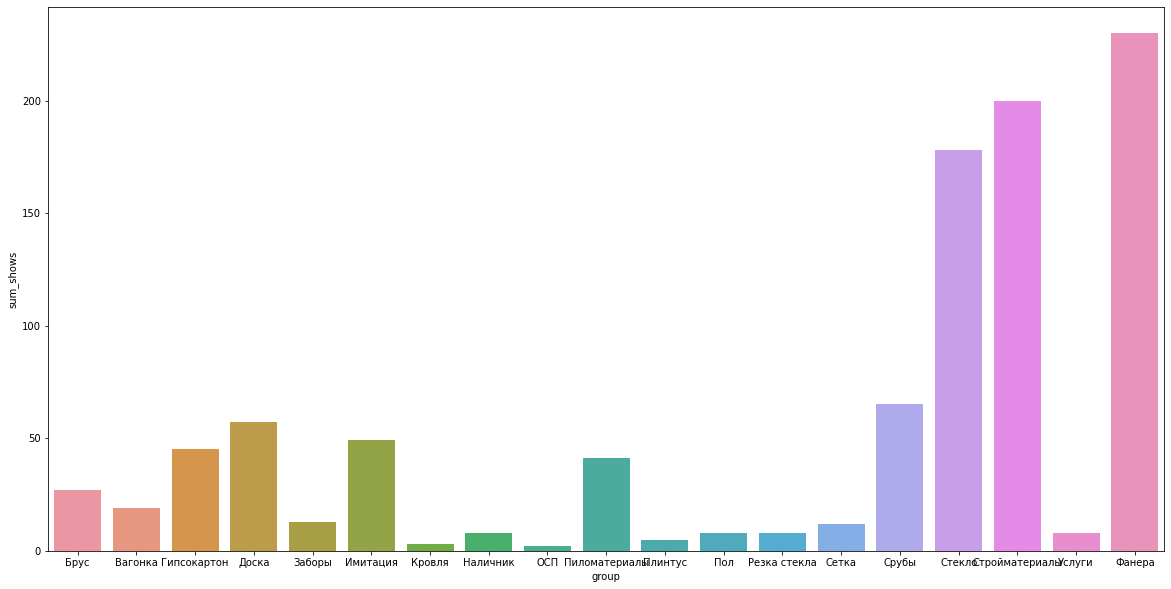

In [148]:
plt.figure(figsize=(20, 10))
sns.barplot(x="group", y="sum_shows", data=popular_query)

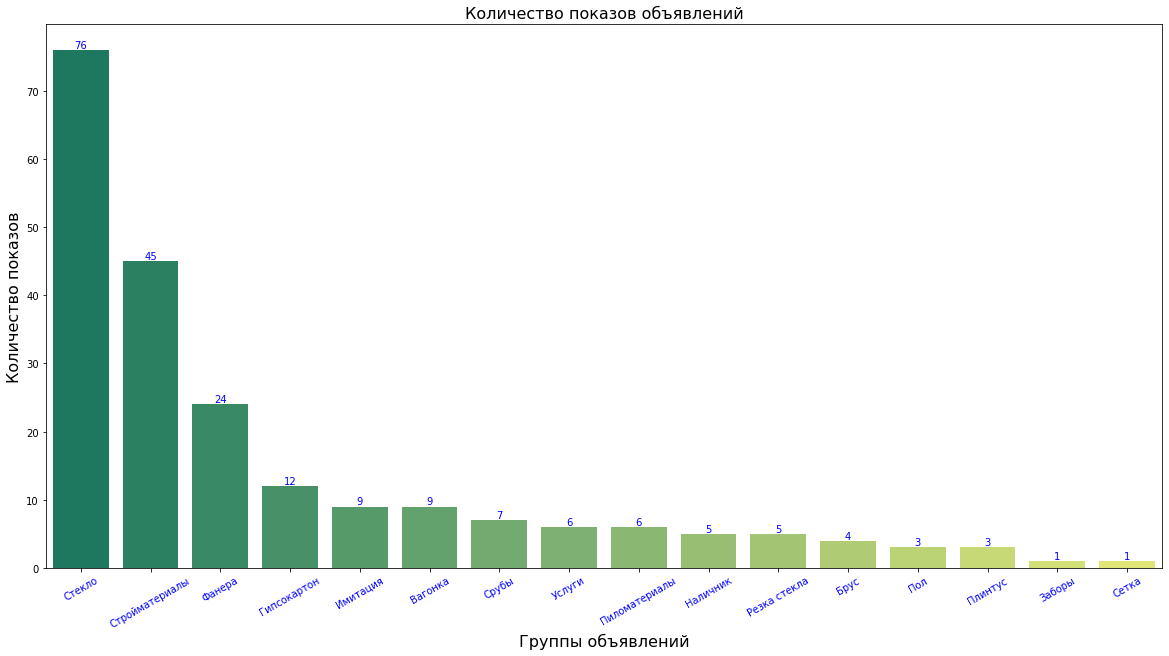

In [345]:
# Гистограмма 'Количество показов объявлений' 20.12.21
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

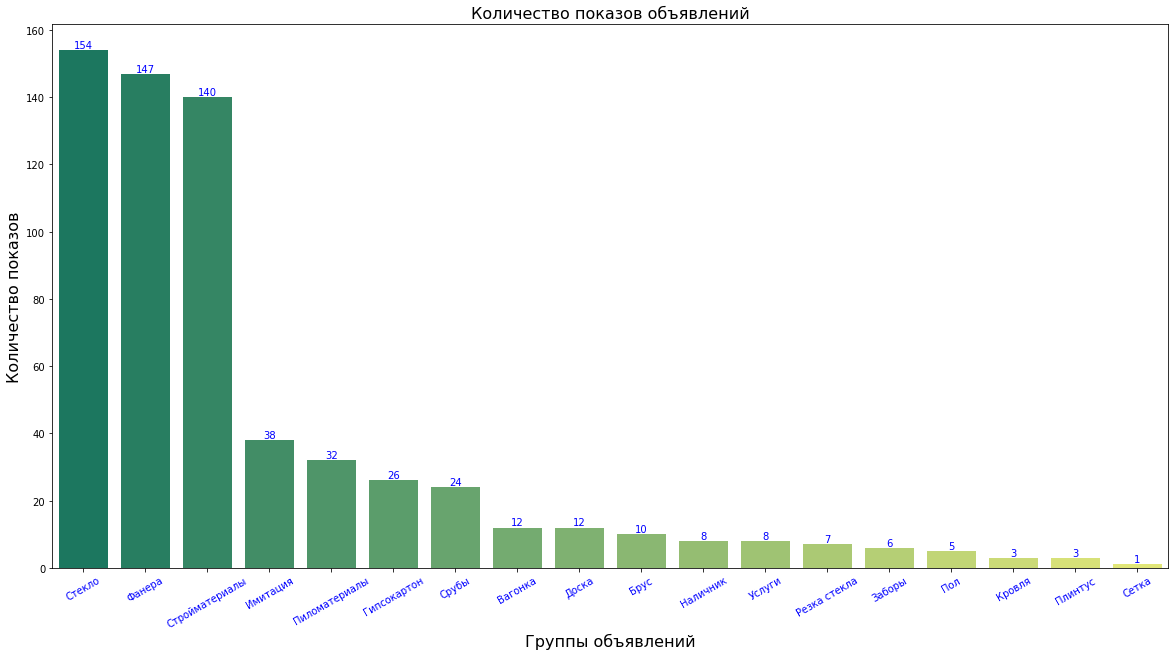

In [87]:
# Гистограмма 'Количество показов объявлений' 31.12.21
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

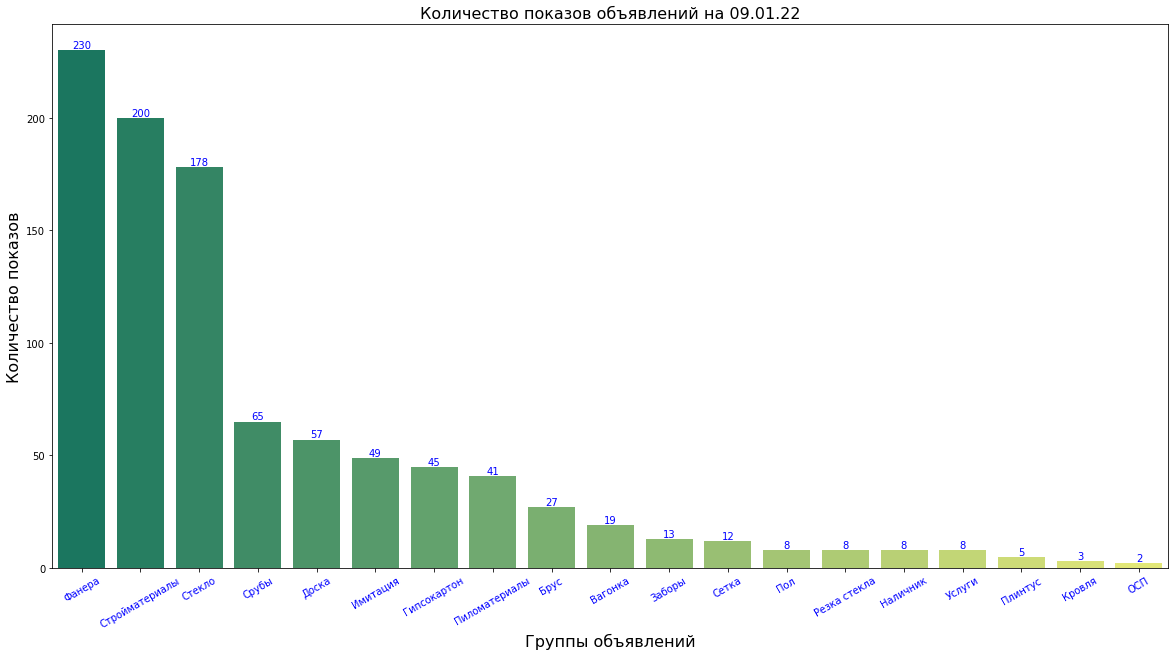

In [216]:
# Гистограмма 'Количество показов объявлений' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений на 09.01.22', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

# fig.savefig('Динамика показов декабрь.png')

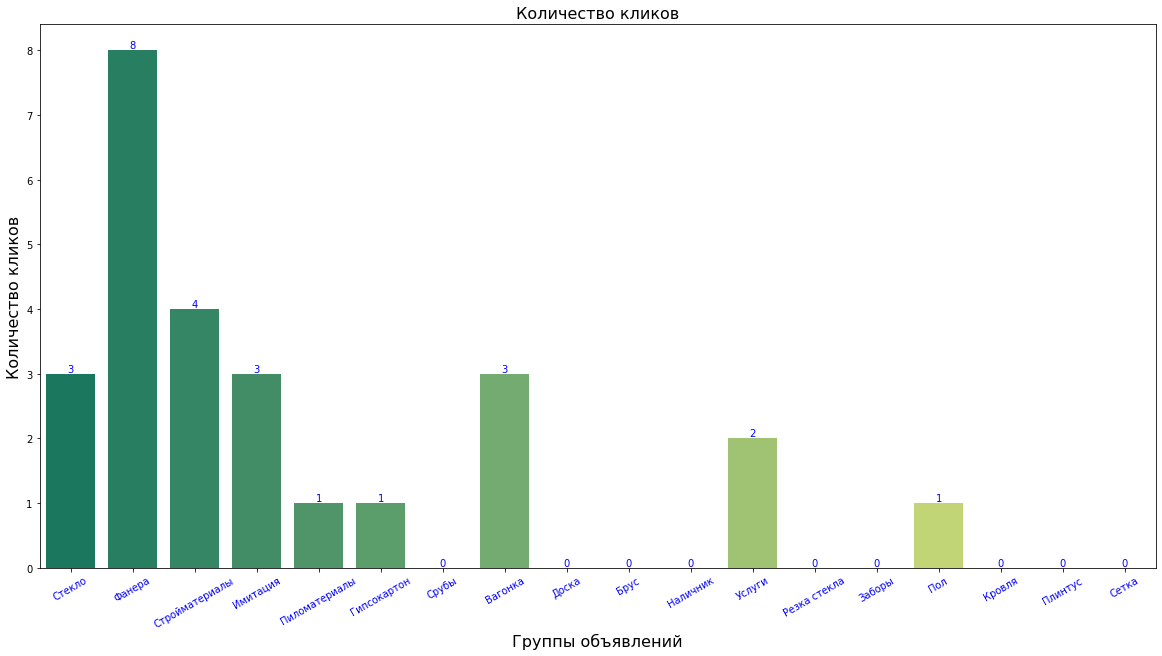

In [88]:
# Гистограмма 'Количество кликов' 20.12.21
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов', fontsize=16)
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            palette='summer')
ax_click.set_xlabel('Группы объявлений', fontsize=16)
ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

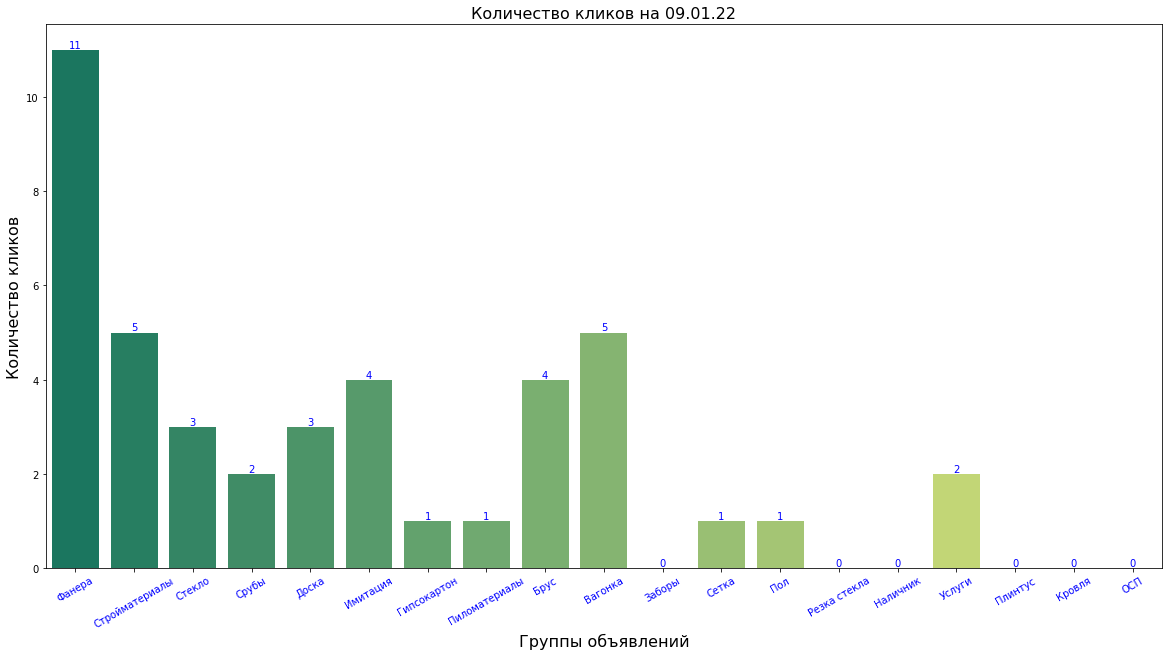

In [152]:
# Гистограмма 'Количество кликов' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов на 09.01.22', fontsize=16)
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            palette='summer')
ax_click.set_xlabel('Группы объявлений', fontsize=16)
ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

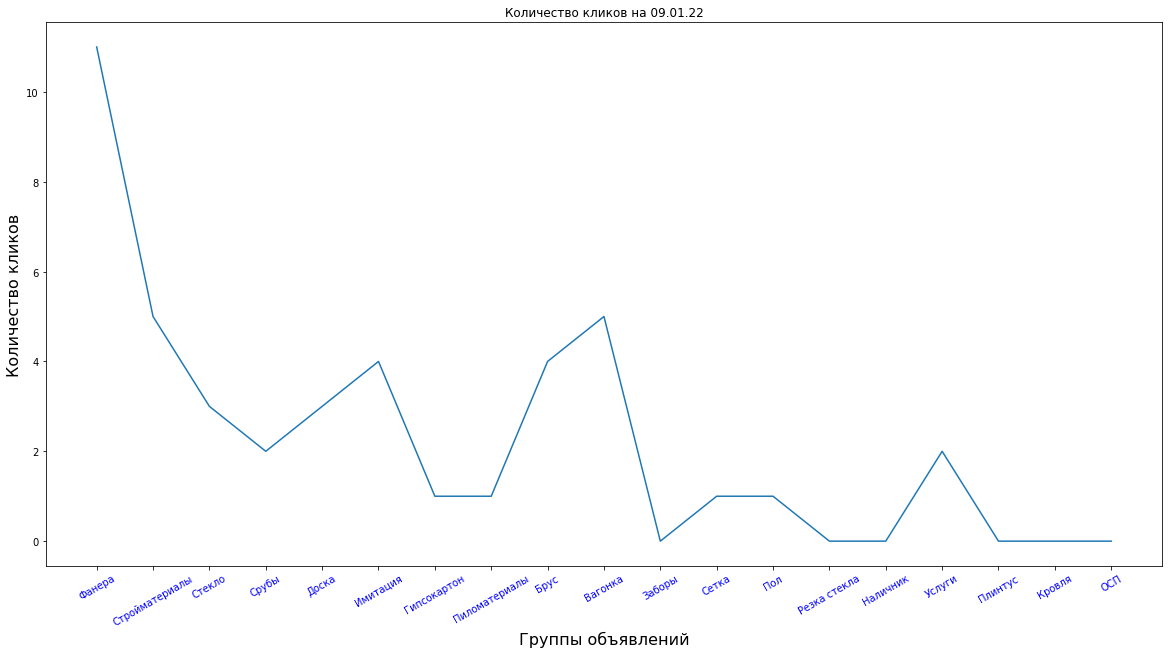

In [153]:
# Line 'Количество кликов' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов на 09.01.22')
ax_line = sns.lineplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            sort=False)
ax_line.set_xlabel('Группы объявлений', fontsize=16)
ax_line.set_ylabel('Количество кликов', fontsize=16)
ax_line.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_line.patches:
             ax_line.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

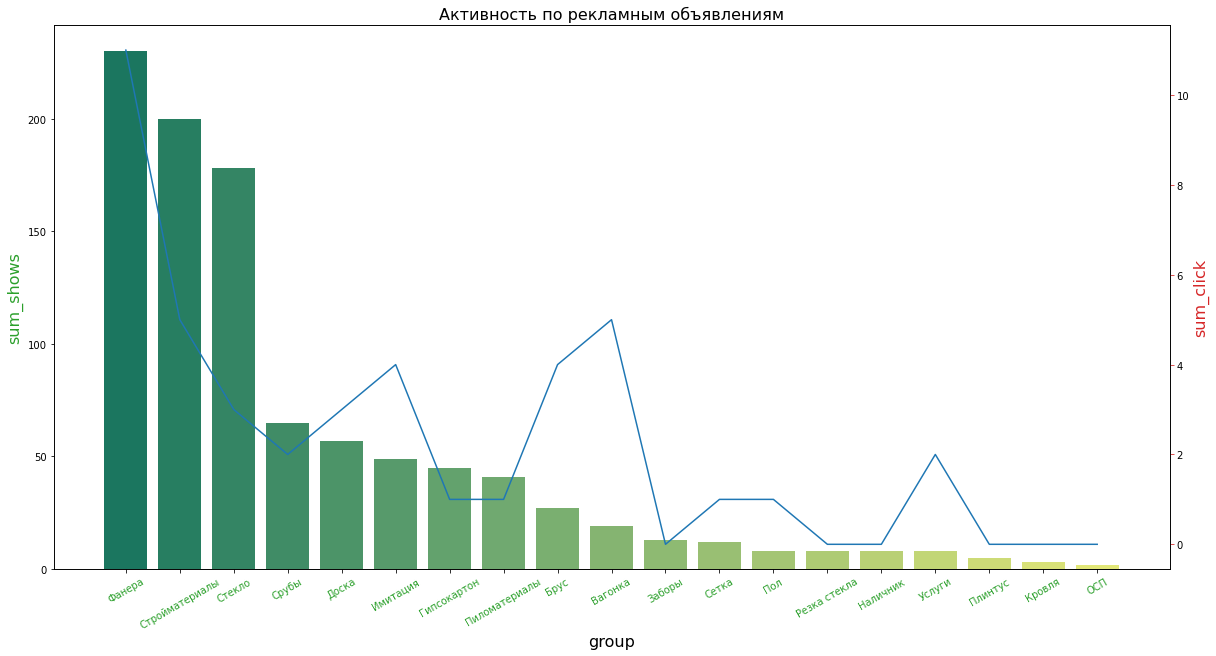

In [154]:
# Нарисуйте базовый слой
popular_query = popular_query.sort_values('sum_shows', ascending=False)
#plt.figure(figsize=(20, 10))
fig, ax_shows = plt.subplots(figsize=(20,10))
ax_shows.set_title('Активность по рекламным объявлениям', fontsize=16)

# Первая гистограмма
color = 'tab:green'
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16, color=color)
ax_shows = sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color=color,    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
ax_shows.tick_params(axis='y')
 #twinxShare x-axis (Схожий синтаксис, например совместное использование оси y twiny)
ax_line = ax_shows.twinx()


# Второй график, линейный график
color = 'tab:red'
ax_line.set_ylabel('Количество кликов', fontsize=16, color=color)
ax_line = sns.lineplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            sort=False)
ax_line.tick_params(axis='y', color=color)

# Отображение результатов рисования
plt.show()

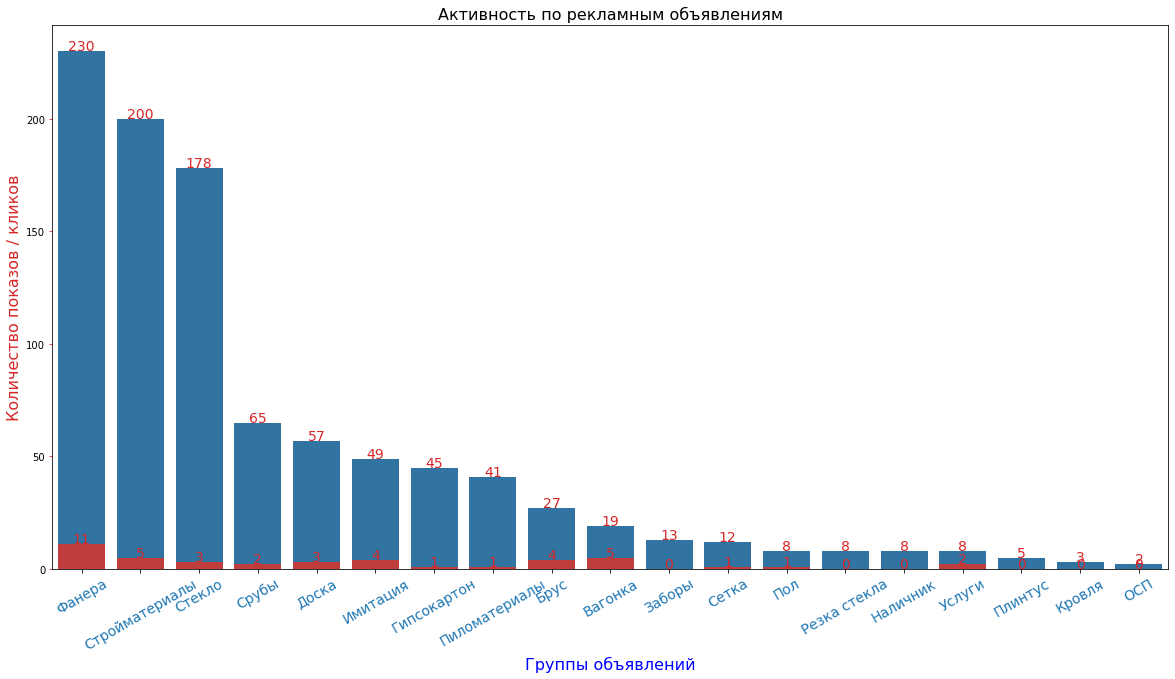

In [155]:
# Нарисуйте базовый слой
popular_query = popular_query.sort_values('sum_shows', ascending=False)
fig, ax_shows = plt.subplots(figsize=(20,10))
#plt.figure(figsize=(20, 10))
ax_shows.set_title('Активность по рекламным объявлениям', fontsize=16)

# Первая гистограмма
color = 'tab:blue'
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            color=color)
ax_shows.set_ylabel('Количество показов', fontsize=16, color=color)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 14, # horizontal
                   color=color,    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
ax_shows.tick_params(axis='y')
 #twinxShare x-axis (Схожий синтаксис, например совместное использование оси y twiny)
#ax_click = ax_shows.twinx()

# annotation here
# for p in ax_shows.patches:
#              ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
#                  textcoords='offset points')


# Вторая гистограмма
color = 'tab:red'
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            color=color)
ax_click.set_ylabel('Количество показов / кликов', fontsize=16, color=color)
ax_click.set_xlabel('Группы объявлений', fontsize=16, color='blue')
# ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.tick_params(axis='y', color=color)

# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
                 textcoords='offset points')

# Отображение результатов рисования
plt.show()

# ax_shows = sns.barplot(x = 'group', y = 'sum_shows', data = popular_query, color = 'red')
# ax_click = sns.barplot(x = 'group', y = 'sum_click', data = popular_query, color = 'blue')

In [ ]:
# ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
# ax.set(xlabel='Driver score', ylabel='Percentage')
# sns.despine()  # убрать часть рамки графика
# plt.show()

# plt.figure(figsize=(20, 10))
# sns.barplot(x="group", y="sum_shows", data=popular_query)

In [ ]:
#df.groupby(['Id']).median().sort_values("Speed").plot.bar()

In [286]:
# plt.figure(figsize=(20, 10))
# ax = sns.barplot(x="group", y="sum_shows", data=popular_query, orient="h")
#ax.fig.autofmt_xdate()

In [ ]:
# ORIGIN
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)


fig, ax = plt.subplots()    
sortedgroupedbar(ax, x="Class",y="Percentage", groupby="Age", data=df)
plt.show()


In [292]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [ ]:
# fig, ax = plt.subplots()    
# sortedgroupedbar(ax, x="sum_shows", y="sum_click", groupby="group", data=popular_query)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()    
# sortedgroupedbar(ax, x="sum_shows", y="sum_click", groupby="group", data=popular_query)
# plt.show()

In [ ]:
# ORIGIN
# Вы должны передать значения от x= до order= . В твоем случае я бы так и сделал:

death = pd.read_csv('https://storage.googleapis.com/hewwo/NCHS_-_Leading_Causes_of_Death__United_States.csv', sep=',', header=0)

plot_order = death.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False).index.values

sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order)

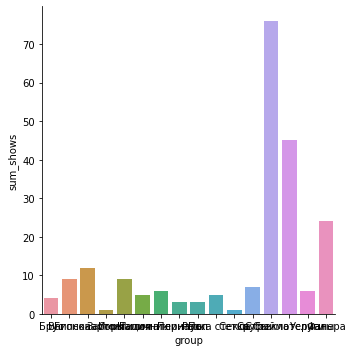

In [318]:
#plot_order = popular_query.sort_values('sum_shows', ascending=False)

sns.catplot(data=popular_query, x='group', y='sum_shows', kind='bar', ci=None, legend_out=False, order=popular_query.group)

In [156]:
#labels = ['Контрольная\nгруппа № %i' % i for i in range(1, 6)]
#value = (12, 24, 18, 11, 6)
# position = np.arange(5)


# ax = plt.subplots(x="group", y="sum_shows", data=popular_query)
# #fig, ax = plt.subplots()

# #ax.barh(position, value) # vertical
# ax.bar(popular_query.sum_shows) # horizontal

# #  Устанавливаем позиции тиков:
# #ax.set_yticks(position) # vertical
# ax.set_xticks() # horizontal

# #  Устанавливаем подписи тиков
# #ax.set_yticklabels(labels,
# #                   fontsize = 15) # vertical
# ax.set_xticklabels(popular_query.group,
#                   fontsize = 15, # horizontal
#                    color = 'b',    #  Цвет текста
#                    rotation = 45,    #  Поворот текста
#                    verticalalignment =  'top')    #  Вертикальное выравнивание

# plt.figure(figsize=(20, 10))
# # fig.set_figwidth(10)
# # fig.set_figheight(6)

# plt.show()



In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="group", y="sum_shows", data=popular_query)

In [ ]:
# ORIGIN
# Или, если вы хотите удалить панель "All causes":

sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order[1:])

In [ ]:
sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order[1:])

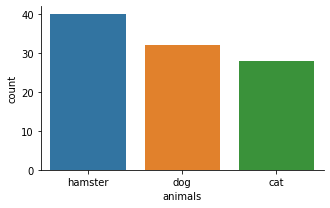

In [295]:
# ORIGIN
# Вы можете установить order аргумент sns.catplot() в предпочтительном порядке.
# Вы можете использовать df['col'].value_counts().index , чтобы получить этот заказ.

a = np.random.choice(['cat', 'dog', 'hamster'], 100)

df = pd.DataFrame(a, columns=['animals'])

sns.catplot(data=df, x='animals',kind='count',ci=None,legend_out=False,
            height=3, aspect=1.5, order=df['animals'].value_counts().index)

In [305]:
#sns.catplot(data=popular_query, x='group', y='sum_shows', kind='count', ci=None, legend_out=False,
#            height=3, aspect=1.5, order=popular_query['group'].value_counts().index)